# Caravan insurance policy challenge

# Environment

This project uses the libraries below;
- library(reshape2) for a plot
- library(ggplot2) for a plot
- library(gridExtra) for a grid plot
- library("MASS") for a plot of a probability density function
- library("tidyverse") for converting a dataframe
- library("DiscriMiner") for a calculation of correlation ratio
- library(leaps) for modeling
- library("caret") for cross-validation
- library(glmnet) for modeling and cross-validation

# Introduction of the prediction task

This project addresses distinguishing a caravan insurance policyholder or not. In addition, models used for prediction are also required to provide useful informationto understand why customers purchased the caravan insurance policy.

In [139]:
options(warn=-1)

# Data Exploration

## Overview of data

### Data structure
Firstly, have a look at the data given. Read and show data.

In [140]:
df = read.delim(sep = "\t", file = "./data//ticdata2000.txt")
cols.initial=c('MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF','MOSHOOFD','MGODRK','MGODPR','MGODOV','MGODGE','MRELGE','MRELSA','MRELOV','MFALLEEN','MFGEKIND','MFWEKIND','MOPLHOOG','MOPLMIDD','MOPLLAAG','MBERHOOG','MBERZELF','MBERBOER','MBERMIDD','MBERARBG','MBERARBO','MSKA','MSKB1','MSKB2','MSKC','MSKD','MHHUUR','MHKOOP','MAUT1','MAUT2','MAUT0','MZFONDS','MZPART','MINKM30','MINK3045','MINK4575','MINK7512','MINK123M','MINKGEM','MKOOPKLA','PWAPART','PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN','PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND','AWAPART','AWABEDR','AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM','ALEVEN','APERSONG','AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED','ABYSTAND','CARAVAN')
names(df)=cols.initial
head(df, 3)

MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,⋯,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
37,1,2,2,8,1,4,1,4,6,⋯,0,0,0,1,0,0,0,0,0,0
37,1,2,2,8,0,4,2,4,3,⋯,0,0,0,1,0,0,0,0,0,0
9,1,3,3,3,2,3,2,4,5,⋯,0,0,0,1,0,0,0,0,0,0


Secondly, confirm the number of observations and variables, and data types. Possible models depend on the number of observations and features. Hence, it is important to check that information.

In [141]:
str(df)

'data.frame':	5821 obs. of  86 variables:
 $ MOSTYPE : int  37 37 9 40 23 39 33 33 11 10 ...
 $ MAANTHUI: int  1 1 1 1 1 2 1 1 2 1 ...
 $ MGEMOMV : int  2 2 3 4 2 3 2 2 3 4 ...
 $ MGEMLEEF: int  2 2 3 2 1 2 3 4 3 3 ...
 $ MOSHOOFD: int  8 8 3 10 5 9 8 8 3 3 ...
 $ MGODRK  : int  1 0 2 1 0 2 0 0 3 1 ...
 $ MGODPR  : int  4 4 3 4 5 2 7 1 5 4 ...
 $ MGODOV  : int  1 2 2 1 0 0 0 3 0 1 ...
 $ MGODGE  : int  4 4 4 4 5 5 2 6 2 4 ...
 $ MRELGE  : int  6 3 5 7 0 7 7 6 7 7 ...
 $ MRELSA  : int  2 2 2 1 6 2 2 0 0 1 ...
 $ MRELOV  : int  2 4 2 2 3 0 0 3 2 2 ...
 $ MFALLEEN: int  0 4 2 2 3 0 0 3 2 0 ...
 $ MFGEKIND: int  4 4 3 4 5 3 5 3 2 3 ...
 $ MFWEKIND: int  5 2 4 4 2 6 4 3 6 6 ...
 $ MOPLHOOG: int  0 0 3 5 0 0 0 0 0 4 ...
 $ MOPLMIDD: int  5 5 4 4 5 4 3 1 4 3 ...
 $ MOPLLAAG: int  4 4 2 0 4 5 6 8 5 3 ...
 $ MBERHOOG: int  0 0 4 0 2 0 2 1 2 0 ...
 $ MBERZELF: int  0 0 0 5 0 0 0 1 0 0 ...
 $ MBERBOER: int  0 0 0 4 0 0 0 0 0 0 ...
 $ MBERMIDD: int  5 7 3 0 4 4 2 1 3 9 ...
 $ MBERARBG: int  0 0 1 

There are **5821 observations** and **86 variables** including CARAVAN, which is the response variable. All of the features are integer data type.

Next, have a look at the number of the caravan policyholders.

In [142]:
sum(df[,"CARAVAN"]==1)

[1] 348

**348** out of 5821 observations are the caravan policyholders. 

It is figured out that the ratio of the policyholders is low, **approximately 6%**.

### Representative values

To grasp the nature of variables, looking through the representative values among independent variables.

In [143]:
summary(df)

    MOSTYPE         MAANTHUI         MGEMOMV         MGEMLEEF    
 Min.   : 1.00   Min.   : 1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:10.00   1st Qu.: 1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :30.00   Median : 1.000   Median :3.000   Median :3.000  
 Mean   :24.25   Mean   : 1.111   Mean   :2.679   Mean   :2.991  
 3rd Qu.:35.00   3rd Qu.: 1.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :41.00   Max.   :10.000   Max.   :5.000   Max.   :6.000  
    MOSHOOFD          MGODRK           MGODPR          MGODOV    
 Min.   : 1.000   Min.   :0.0000   Min.   :0.000   Min.   :0.00  
 1st Qu.: 3.000   1st Qu.:0.0000   1st Qu.:4.000   1st Qu.:0.00  
 Median : 7.000   Median :0.0000   Median :5.000   Median :1.00  
 Mean   : 5.773   Mean   :0.6966   Mean   :4.627   Mean   :1.07  
 3rd Qu.: 8.000   3rd Qu.:1.0000   3rd Qu.:6.000   3rd Qu.:2.00  
 Max.   :10.000   Max.   :9.0000   Max.   :9.000   Max.   :5.00  
     MGODGE          MRELGE          MRELSA           MRELOV     
 Min.   :0

Most of the variables beginning with the capital "P" and "A" show **zero medians**.

Those variables are relating to **the number of contributions** and **the number of policies** according to the [data dictionary](http://kdd.ics.uci.edu/databases/tic/tic.html).

It would indicate that they are **sparse variables** and their frequency are low.

### Categorizing the variable with the data dictionary given

To deepen the understanding of features, categorise independent variables.

1. Categorical variables

    According to the data dictionary, **only MOSTYPE and MOSHOOFD** are categorical variables.
    
    
2. Ordinal variables

    The features beginning **the capital M and P** are ordinal variables denoting the percentage and the amount of contribution respectively.


3. Continuous variables

    The features of **MAANTHUI, MGEMOMV, MGEMLEEF and ones beginning the capital A** are continuous variables.


4. Corresponding variables

    The features beginning **the capital P and A are corresponding together**. 
    
    For example, PWAPART and AWAPART represent the contribution and the number of private third party insurance respectively. 
    
    **It is assumed that those corresponding variables are highly correlated**.

### Uncover the nature of variables

MOSTYPE and MOSHOOFD are categorical variables.

To grasp the distribution of those variables, plot tables and histograms.

##### Plot the table and histogram

The blue histogram represents the frequency of the caravan policyholders, whereas the non-caravan policyholders are denoted as the red one.


  1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18  19  20  21 
124  82 249  52  45 119  44 339 278 165 153 111 179   5  16   9  19   3  25  15 
 22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41 
 98 251 180  82  48  50  25  86 118 205 141 809 182 214 225 132 339 328  71 205 

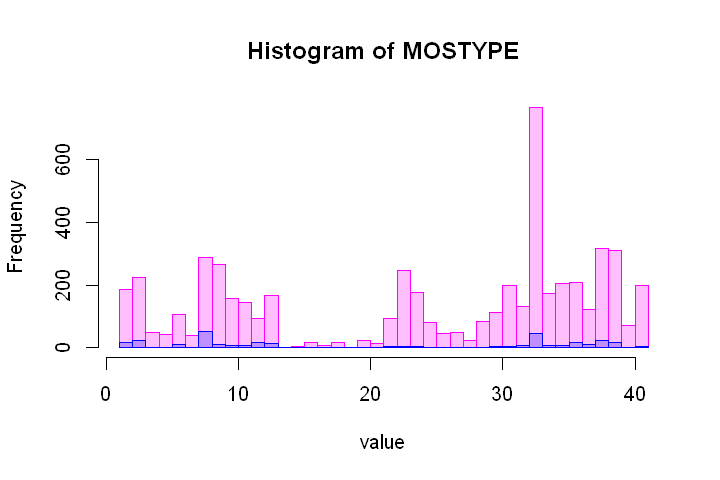

In [144]:
options(repr.plot.height=4,repr.plot.width=6)
hist(df[df[,"CARAVAN"]==0, "MOSTYPE"], breaks=seq(1,41), xlab="value", main="Histogram of MOSTYPE", col = "#ff00ff40", border = "#ff00ff")
hist(df[df[,"CARAVAN"]==1, "MOSTYPE"], breaks=seq(1,41), col = "#0000ff40", border = "#0000ff", add=TRUE)
table(df[,"MOSTYPE"])

There is no bin in which the ratio of a caravan policyholder is high.

One finding is that there is **no value of 14 in MOSTYPE**. It means that when generating dummy variables, the dummied feature of this value should not be produced.


   1    2    3    4    5    6    7    8    9   10 
 552  502  886   52  569  205  550 1562  667  276 

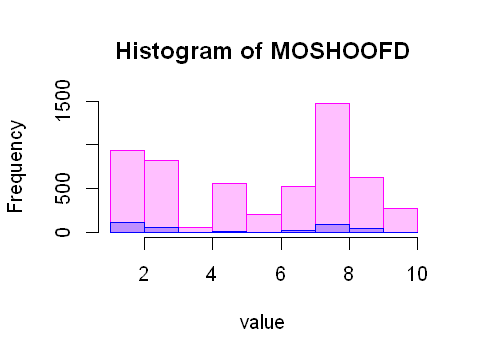

In [145]:
options(repr.plot.height=3,repr.plot.width=4)
hist(df[df[,"CARAVAN"]==0, "MOSHOOFD"], breaks=seq(1,10), xlab="value", main="Histogram of MOSHOOFD", col = "#ff00ff40", border = "#ff00ff")
hist(df[df[,"CARAVAN"]==1, "MOSHOOFD"], breaks=seq(1,10), col = "#0000ff40", border = "#0000ff", add=TRUE)
table(df[,"MOSHOOFD"])

Similarly, there is no bin in which the ratio of a caravan policyholder is high.

Differently, all categorical values in MOSHOOFD exit.

###  Correlation between the corresponding ordinal variables

As previously mentioned, the features beginning the capital P and A are corresponding.

Since correlations between independent variables affect some models, it is important to check it.

To check the correlations of those variables, plot a heatmap.

In [146]:
# define variables starting with the capital P and A
cols.cor.capp=c('PWAPART','PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN','PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND')
cols.cor.capa=c('AWAPART','AWABEDR','AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM','ALEVEN','APERSONG','AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED','ABYSTAND')

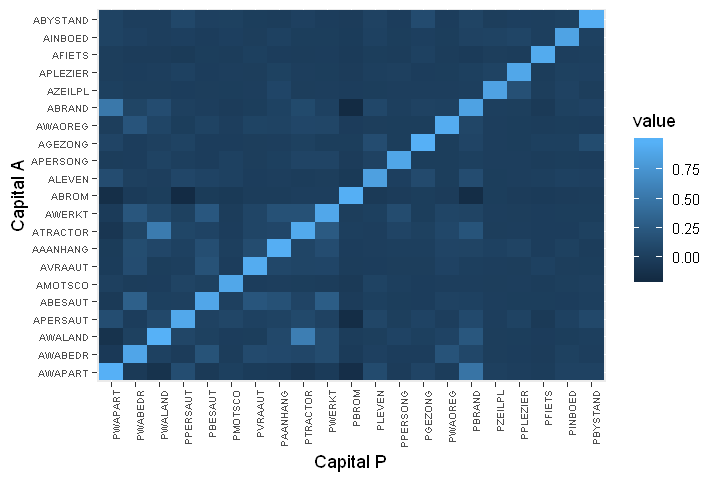

In [147]:
# Plot the heatmap of
library(reshape2)
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)
ggplot(data = melt(cor(x=df[,cols.cor.capp],y=df[,cols.cor.capa] )), aes(x=Var1, y=Var2, fill=value)) + 
    geom_tile()+
    scale_color_hue(name = "correlation")+
    labs(x = "Capital P", y = "Capital A")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1, size=6),
          axis.text.y = element_text(size=6),plot.caption = element_text(size = 8))

As this plot shows, the corresponding variable pairs are highly correlated together.

Since a pair of the corresponding variables describe each other, one of them would be unnecessary to hold.

### Correlation between independent variables

Similar to the previous section, check the correlations between independent variables.

Note: variables beginning with the capital P are excluded from the targets of this section since they are represented by the capital A variables.

In [148]:
library("tidyverse")

##### Generate the list of correlations

In [149]:
# define all independent variables except the categorical and the capital P variables.
cols=setdiff(colnames(df), c("MOSTYPE","MOSHOOFD", cols.cor.capp))
data.frame(cor(df[cols])) %>% rownames_to_column(var = "idx") %>% gather(key, value, -idx) ->df.cor

###### Filter into highly correlated pairs

Picking up pairs having more than 0.8 correlation.

In [150]:
# extract all combinations correlating over abs(0.8)
df.cor.high=df.cor[(abs(df.cor["value"])>=.8)&(abs(df.cor["value"])<1),]
# Remove duplicated combinations
hihg_cor_vec=list()
for(i in seq(1,nrow(df.cor.high),1)){
    elm=list(sort(c(df.cor.high[i,"idx"], df.cor.high[i,"key"])))
    hihg_cor_vec=append(hihg_cor_vec, elm)
}
cols.cor.high.pairs=unique(hihg_cor_vec)

##### Draw scatter plots about the highly correlated pairs

In [151]:
library(ggplot2)

In [152]:
plots.cor.high=list()
for (i in seq(1,length(cols.cor.high.pairs))){
    labelX=cols.cor.high.pairs[[i]][1]
    labelY=cols.cor.high.pairs[[i]][2]
    plots.cor.high[[i]]=ggplot(data=df, aes_(x=as.name(labelX), y=as.name(labelY)))+
        geom_point() +
        ggtitle(paste(labelX,"and",labelY))+
        labs(x = labelX, y = labelY)+
        theme(plot.caption = element_text(size = 8, face = "bold"),
            axis.title = element_text(size = 8),
            plot.title = element_text(size = 8, face = "bold", hjust = 0.5))
}

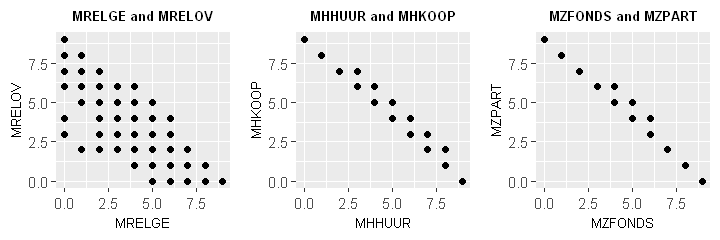

In [153]:
library(gridExtra)
options(repr.plot.width=6,repr.plot.height=2)
do.call("grid.arrange", c(plots.cor.high, ncol=3))

The 2 pairs below are strongly and negatively correlated together. It indicates that they are almost exclusive.

    - MHHUUR(National Health Service) and MZPART (Private health insurance)
    
    - MZFONDS(Rented house) and MHKOOP(Homeowners)
    
On the other hand, a linear relationship between MRELGE (Married) and MRELOV (Other relation) is not as narrow as other pairs. It means that they are somewhat exclusive but there would be another factor to describe those 2 variables.

Hence, one of the pairs among the strongly correlated pairs could be removed, whereas MZFONDS and MHKOOP should be kept.

In [154]:
# Define the candidates of being removed.
cols.cor.high=c("MZFONDS","MHHUUR")

### Correlation Ratio

Features having a high correlation with a response variable could be a good predictor for a model assuming linearity among predictors and a response variable.

Therefore, it is meaningful to check the existence of those features.

Here, figure out the relationship between **quantitative variables** and **CARAVAN (qualitative variable)** by introducing the correlation ratio.

##### Compute correlation ratio

In [155]:
library("DiscriMiner")

In [156]:
# define the quantitative cols
cols=setdiff(colnames(df), c('MOSTYPE','MOSHOOFD','CARAVAN', cols.cor.capp, cols.cor.high))
df.corratio=data.frame()
for (i in seq(1, length(cols))){
    # calculate correlation ratio and store the result into df.corratio
    ratio_=corRatio(variable=df[,cols[i]], group=df[,"CARAVAN"])
    df_=data.frame(variable=cols[i], ratio=ratio_)
    df.corratio=rbind(df.corratio, df_)
}
# add rank column and sort it
df.corratio["rank"]=as.integer(rank(-df.corratio[,"ratio"]))
df.corratio=df.corratio[order(df.corratio["rank"]),]

##### Plot the all ratio into a histogram

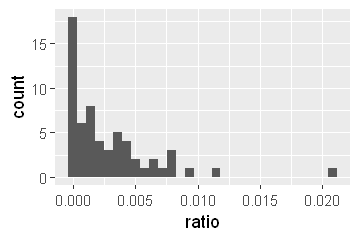

In [157]:
options(repr.plot.height=2,repr.plot.width=3)
plt=ggplot(data=df.corratio,aes(x=ratio))+
    geom_histogram(bins=30)
plt

Since the proportion of the caravan policyholder is approximately 6%, the correlation ratio is basically very low among each variable. However, it is possible to do relative evaluation among the variables.

According to the histogram, many variables are located at the first bin, indicating no correlation with CARAVAN.

##### Display the best 10 correlation ratio

In [158]:
head(df.corratio, 10)

,variable,ratio,rank
,<fct>,<dbl>,<int>
43,APERSAUT,0.020807805,1
57,APLEZIER,0.011171843,2
39,MKOOPKLA,0.009199731,3
16,MOPLLAAG,0.008194729,4
38,MINKGEM,0.008134808,5
40,AWAPART,0.007984792,6
14,MOPLHOOG,0.007161235,7
33,MINKM30,0.006372739,8
28,MHKOOP,0.006159419,9


Best 10 variables are;

1. APERSAUT - Number of car policies
2. APLEZIER - Number of boat policies
3. MKOOPKLA - Purchasing power class
4. MOPLLAAG - Lower level education
5. MINKGEM - Average income
6. AWAPART - Number of private third party insurance
7. MOPLHOOG - High level education
8. MINKM30 - Income < 30.000
9. MHKOOP - Home owners
10. MAUT0 - No car

Those variables seem to indicate the degree of wealth which customers have.

Those variables could be better predictors for models assuming linearity.

### Caravan policyholder's distribution

LDA, a classification model, draw a decision boundary based on numerical predictors.

To draw an appropriate boundary, it is helpful for the classifier if predictors have the properties below;

- The predictor value where caravan = 0 and the predictor value where caravan = 1 are **normally** distributed

- The predictor value where caravan = 0 and the predictor value where caravan = 1 are **separately** distributed

The sample image below showing histograms which normally and separately distribute.

<p>Figure1: histograms of class1 and class2 (James, 2015)</p>
<img border="0" src="./img/lda1.png" width="300" align=left>

In order to confirm whether features have such nature, plot histograms.

##### Prepare plots

The number of numerical predictors is 62, which is too much to plot all of them at once.

Hence, predictors having either the 1st or the 2nd nature above are reported here.

In [159]:
cols.lda=c('MOPLLAAG','MBERARBG','MSKC','MINK4575','MINKGEM','MKOOPKLA','MAUT1','APERSAUT','MBERHOOG','ABRAND','AWAPART')

In [160]:
library(ggplot2)
plots.hist=list()
for (i in seq(1, length(cols.lda))){
    colname=cols.lda[i]
    tmp.df0=data.frame(X=df[df[,"CARAVAN"]==0,colname])
    tmp.df1=data.frame(X=df[df[,"CARAVAN"]==1,colname])

    plots.hist[[i]]=ggplot(data=df, aes())+
        geom_histogram(data=tmp.df0,aes(x=X,y=..density..),bins = 30,alpha=0.4,color="red")+
        geom_histogram(data=tmp.df1,aes(x=X,y=..density..),bins = 30,alpha=0.4,color="blue")+
        ggtitle(colname)+
        labs(x = colname)+
        theme(plot.caption = element_text(size = 8, face = "bold"),
              plot.title = element_text(size = 8, face = "bold", hjust = 0.5),
              axis.title = element_text(size = 8))
}

##### Plots histograms

The **blue histogram** represents the probability density of **the caravan policyholders**, whereas **the non-caravan policyholders** are denoted as **the red one**.

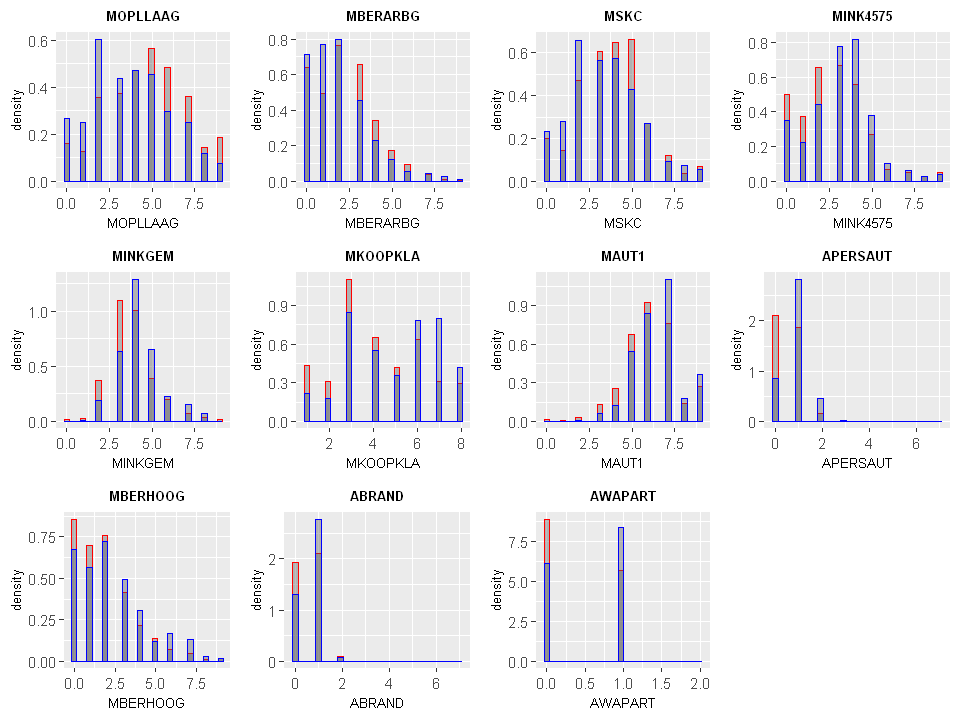

In [161]:
options(repr.plot.width=8,repr.plot.height=6)
library(gridExtra)
do.call("grid.arrange", c(plots.hist, ncol=4))

##### Findings

Although there are no predictors whose each class is exactly normally and separately distributed, some are either normally or separately distributed.

These 11 predictors would satisfy the nature required to contribute to predicting.

1.  MOPLLAAG - Lower level education
2.  MBERARBG - Skilled labourers
3.  MBERHOOG - High status
4.  MSKC - Social class C
5.  MINK4575 - Income 45-75.000
6.  MINKGEM - Average income
7.  MKOOPKLA - Purchasing power class
8.  MAUT1 - 1 car
9.  ABRAND - Number of fire policies
10. AWAPART - Number of private third party insurance
11. APERSAUT    - Number of car policies

# Model selection

1. Logistic Regression

    Logistic Regression would be an appropriate model for this task. This model can provide not only the probabilities of occurrence of the event, but also coefficients denoting how much contributes to making the probabilities. This information helps to determine what kind of customers should have a mail from an insurance company.
    
    In addition, the exploration data analysis shows that there are correlated features with CARAVAN. It indicates that Logistic Regression can hold predictors contributing to the prediction.
    
    On the other hand, the exploration also detects the existence of multicollinearity between features. Logistic Regression cannot estimate parameters when predictors are strongly correlated together. Hence, one of the correlated pair should be removed for this model.
    
    In terms of the number of features, it reaches to over 60 variables after removing correlated ones. In addition, the exploration also finds that **many features have no correlation with CARAVAN**. Therefore, it is assumed that many of them have no coefficient. To efficiently and effectively select related features to purchasing the caravan policy, **automated feature selection** should be considered. It is possible for Logistic Regression to introduce 2 ways of feature selection, which are **subset selection & Logistic Regression** and **Lasso Logistic Regression**.
    
    In conclusion, 1. subset selection & Logistic Regression and 2. Lasso Logistic Regression are adopted.
    
    
2. Linear Descriminant Analysis

    This model is not very appropriate for this task since it does not provide information on how much and which variable contributes to the probability of the event occurrence. In addition, LDA cannot deal with categorical values.
    
    However, the exploration recognises that several features are normally and separately distributed, which satisfies the assumption of LDA. Furthermore, the exploration demonstrates that in the histogram plots, categorical values do not show any patterns which are helpful to find the caravan policyholders.
    
    In conclusion, LDA performs based on different properties of features. Therefore, introducing this model could provide a good model comparison with Logistic Regression.

# Pre-Processing

### Generate dummy variable

To deal with categorical variables in the prediction task, convert them into dummy variables.

Categorical variables are `MOSTYPE` and `MOSHOOFD` which have 40 and 10 levels respectively.

From those 2 variables, generate 50 dummy variables.

After that, remove 2 duplicated variables and 2 original variables.

##### Generate dummy variables

In [162]:
library("dummies")

In [163]:
MOSTYPE=as.factor(df$MOSTYPE)
MOSHOOFD=as.factor(df$MOSHOOFD)
df.dm=cbind(df, dummy.data.frame(data.frame(MOSTYPE, MOSHOOFD)))

##### Drop duplicated and original variables

In [164]:
df.dm=df.dm[, -which (colnames(df.dm) %in% c("MOSTYPE","MOSHOOFD","MOSHOOFD10","MOSTYPE41"))]

Now, there are 132 variables.

In [165]:
"MOSTYPE14" %in% colnames(df.dm)

[1] FALSE

As the previous exploration points out, there is no value of 14 in the categorical variable of MOSTYPE.

Hence, the dummied variable `MOSTYPE14` is not generated.

# First Model

# Subset selection + Logistic regression

### Data preparation

##### Remove highly correlated independent variables

Use dummied data frame.

According to the previous exploration, remove the features highly correlated with another independent variable.

In [166]:
cols.subsetbase=setdiff(colnames(df.dm), c(cols.cor.high, cols.cor.capp))
df.subsetbase=df.dm[cols.subsetbase]
print(paste("There are",length(cols.subsetbase),"variables including CARAVAN now."))

[1] "There are 109 variables including CARAVAN now."


##### Build a model for subset selection

In [167]:
library(leaps)

In [168]:
fit.glm = glm(CARAVAN ~ ., data = df.subsetbase, family = binomial)

##### Investigate the warning message

This message occurs when there are separations and quasi-separations among predictors.

As the left-hand side of the picture in figure 2 shows, separations mean that one predictor (X) can perfectly determine the class of a response value (Y). Similarly, quasi-separations also do the almost same decision with a little overlap as the right-hand side of picture shows.

These properties of variables affect on estimating parameters for Logistic Regression.

<p>Figure2: Image of Separation and Quasi-separations (Minitab, LLC, 2019)</p>
<img border="0" src="./img/sepa.png" width="400" align=left>

Extracting the features having separation or quasi-separations through the equation below.

The maximum value in a predictor where CARAVAN = 0 $\le$ the minimum value in the predictor where CARAVAN = 1.

In [169]:
cols=setdiff(colnames(df.subsetbase),"CARAVAN")
cols.sepa=list()
for (i in seq(1, length(cols))){
    sum0=summary(df.subsetbase[df.subsetbase[,"CARAVAN"]==0, cols[[i]]])
    sum1=summary(df.subsetbase[df.subsetbase[,"CARAVAN"]==1, cols[[i]]])
    if ((sum0[["Max."]] <=  sum1[["Min."]]) | (sum0[["Min."]] >=  sum1[["Max."]])){
        cols.sepa=append(cols.sepa,list(cols[i]))
    }
}

The extracted variables are;

In [170]:
as.character(cols.sepa)

[1] "AVRAAUT"   "AWERKT"    "MOSTYPE15" "MOSTYPE16" "MOSTYPE17" "MOSTYPE18"
 [7] "MOSTYPE19" "MOSTYPE21" "MOSTYPE28" "MOSTYPE40" "MOSHOOFD4"

##### Findings

There are 11 variables which could affect the modelling.

Keep them and confirm whether these predictors are held or removed by subset selection and Lasso Regression.

###### Run forward feature selection.

In [171]:
# set nvmax = 100 to save execution time. It is not necessary to know 100th and more variables being selected.
regfit.full=regsubsets(fit.glm$formula, nvmax = 108, data=df.subsetbase, method = "forward")

##### Store the selected variables into a data frame

In [172]:
# generate df based on the outcome
tmp.cols=summary(regfit.full)$which
tmp.cols=tmp.cols[, -which (colnames(tmp.cols) %in% c("(Intercept)"))]
# convert the df above into a readable df
cols.subsets=data.frame(matrix(rep(NA, 2), nrow=1))[numeric(0), ]
colnames(cols.subsets) = c("ord", "variable")
for (row_ in seq(1, nrow(tmp.cols), 1)){
    for (col_ in names(tmp.cols[row_, ])){
        if ((tmp.cols[row_, col_]) && !(col_ %in% cols.subsets[,"variable"])) {
            cols.subsets=rbind(cols.subsets, data.frame("ord"=row_, "variable"=col_))
        }
    }
}

##### Figure out the appropriate number of variables through plots

The fitted model `regfit.full` contains `C_p`, `BIC` and `AdjR2` of the models at each number of variables.

The measurement of `C_p`, `BIC` indicates the badness of the model, whereas the higher `AdjR2` indicates the better performance of the model.

Based on this information, figure out the optimum number of variables.

##### Define the function giving a scatter plot based on inputs of `C_p`, `BIC` and `AdjR2`

In [173]:
plot_subset_summary=function(values, points, name_){
    tmp.df=data.frame(X=seq(1, length(values)), Y=values)
    tmp.df2=data.frame(X=points, Y=values[points], name=c("C_p", "BIC", "AdjR2"))
    ggplot()+
        geom_line(data=tmp.df, aes(x=X, y=Y))+
        geom_point(data=tmp.df2, aes(x=X, y=Y, color=name))+
        labs(x = "# of variables", y = name_)+
        scale_color_hue(name = "Opt points from")+
        theme(axis.title = element_text(size = 8),legend.title = element_text(size = 8),
             legend.text = element_text(size = 8))
}

##### Generate and draw plots

In [174]:
# store cp, bic and adjR^2 into a list respectively
regfit.full.summary=summary(regfit.full)
mincp = which.min(regfit.full.summary$cp)
minbic = which.min(regfit.full.summary$bic)
max_adjr2 = which.max(regfit.full.summary$adjr2)
opts=c(mincp, minbic, max_adjr2)

In [175]:
# put the lists into the function, then obtain the lists of plots
plots.subsets.opts=list()
plots.subsets.opts[[1]]=plot_subset_summary(regfit.full.summary$cp, opts, "C_p")
plots.subsets.opts[[2]]=plot_subset_summary(regfit.full.summary$bic, opts, "BIC")
plots.subsets.opts[[3]]=plot_subset_summary(regfit.full.summary$adjr2, opts, "AdjR2")
plots.subsets.opts[[4]]=plot_subset_summary(regfit.full.summary$rss, opts, "RSS")

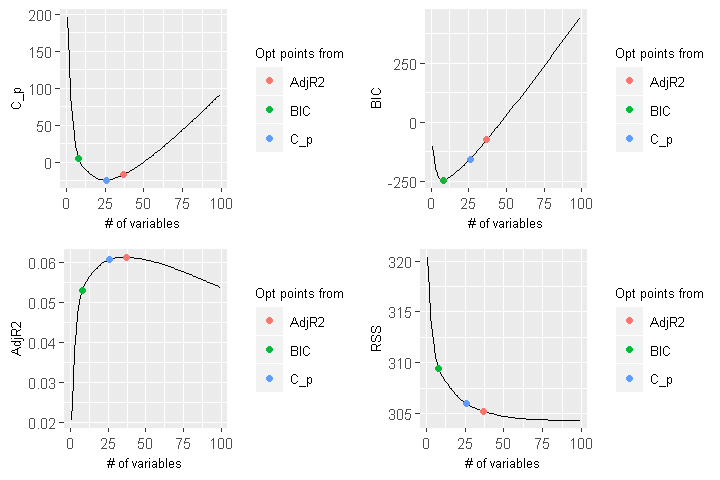

In [176]:
# Draw the plots
options(repr.plot.width=6,repr.plot.height=4)
library(gridExtra)
do.call("grid.arrange", c(plots.subsets.opts, ncol=2))

In [177]:
# Show the number of variables where cp, bic and adjR^2 is optimum
print(paste("Min BIC is given by",minbic,"of variables"))
print(paste("Min CP  is given by",mincp,"of variables"))
print(paste("Min AdjR^2 is given by",max_adjr2,"of variables"))

[1] "Min BIC is given by 8 of variables"
[1] "Min CP  is given by 26 of variables"
[1] "Min AdjR^2 is given by 37 of variables"


##### Findings

As the output above shows;

    1. The minimum BIC is given by 8 variables
    2. The minimum C_P is given by 26 variables
    3. The minimum Adjusted R^2 is given by 37 variables

In terms of the optimum number of variables based on the minimum C_p, it also gives the almost highest adjusted R^2. In addition, it also performs the lower BIC than adjusted R^2. At this point, the minimum C_p would provide a better model than the minimum adjusted R^2.

On the other hand, the point given by the minimum BIC is competitive to the minimum C_p. Its BIC score is far lower than the point given by the minimum C_p although other scores are worse than the point given by the minimum C_p.

In the later step, those 2 points are compared and determined which is better.

#### Show the summary given by the minimum CP.

In [178]:
cols.subsets.mincp=c(as.character(cols.subsets[,"variable"])[1:mincp], "CARAVAN")
df.mincp=df.dm[cols.subsets.mincp]
fit.glm.mincp = glm(fit.glm$formula, data = df.mincp, family = binomial)
summary(fit.glm.mincp)


Call:
glm(formula = fit.glm$formula, family = binomial, data = df.mincp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6704  -0.3654  -0.2654  -0.1977   3.0585  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.55969    0.57219  -7.969 1.60e-15 ***
APERSAUT     0.78862    0.08829   8.932  < 2e-16 ***
APLEZIER     1.92380    0.39945   4.816 1.46e-06 ***
MOSTYPE8     0.80520    0.19574   4.114 3.89e-05 ***
AWAPART      0.41766    0.14329   2.915 0.003559 ** 
MOPLLAAG    -0.20477    0.05159  -3.969 7.22e-05 ***
MRELGE       0.06520    0.03743   1.742 0.081550 .  
MOSTYPE12    1.10710    0.31026   3.568 0.000359 ***
ABYSTAND     0.48995    0.30746   1.594 0.111041    
AFIETS       0.43650    0.19801   2.204 0.027492 *  
MOSTYPE3     0.54221    0.24827   2.184 0.028965 *  
MBERBOER    -0.16017    0.07963  -2.011 0.044286 *  
MGODPR       0.06321    0.03630   1.741 0.081603 .  
MOSTYPE23   -0.99418    0.54154  -1.836 0.066383 .  
MI

##### Findings

- A half of variables are not significant if the p-value set to $\alpha \lt 0.1$

- It does not includes separation and quasi-separation predictors

#### Show the summary given by the minimum BIC.

In [179]:
cols.subsets.minbic=c(as.character(cols.subsets[,"variable"])[1:minbic], "CARAVAN")
fit.glm.minbic = glm(fit.glm$formula, data = df.dm[cols.subsets.minbic], family = binomial)
summary(fit.glm.minbic)


Call:
glm(formula = fit.glm$formula, family = binomial, data = df.dm[cols.subsets.minbic])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7679  -0.3726  -0.2767  -0.2137   3.0069  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.06051    0.27329 -14.858  < 2e-16 ***
APERSAUT     0.77229    0.08655   8.923  < 2e-16 ***
APLEZIER     2.05190    0.38801   5.288 1.24e-07 ***
MOSTYPE8     0.71530    0.17855   4.006 6.17e-05 ***
AWAPART      0.61071    0.11484   5.318 1.05e-07 ***
MOPLLAAG    -0.11905    0.02624  -4.536 5.72e-06 ***
MRELGE       0.12805    0.03306   3.873 0.000108 ***
MOSTYPE12    0.85131    0.28742   2.962 0.003057 ** 
ABYSTAND     0.57418    0.30316   1.894 0.058222 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2635.4  on 5820  degrees of freedom
Residual deviance: 2381.5  on 5812  degrees of freedom
AIC: 2399.5



##### Findings
- It does not include separation and quasi-separation predictors
- Most of the variables are significant if the p-value set to $\alpha \lt 0.1$
- Comparing with the summary given by the minimum CP;
    - AIC score increases from 2375.5 to 2399.5
    - Residual deviance increases from 2321.5 to 2381.5
    
    
- The results above indicate a model performance would be slightly lower than the previous one


Check the impact of each variable on the deviance.

In [180]:
anova(fit.glm.minbic, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,5820,2635.417,NA
APERSAUT,1,105.393959,5819,2530.023,1.001146e-24
APLEZIER,1,25.439477,5818,2504.584,4.564808e-07
MOSTYPE8,1,35.417122,5817,2469.167,2.661371e-09
AWAPART,1,31.509853,5816,2437.657,1.984308e-08
MOPLLAAG,1,26.899121,5815,2410.758,2.143563e-07
MRELGE,1,18.675417,5814,2392.082,1.549676e-05
MOSTYPE12,1,7.317349,5813,2384.765,6.829206e-03
ABYSTAND,1,3.245623,5812,2381.519,7.161446e-02


##### Findings
- Most of the predictors contribute to reducing the deviance.

- Only MOSTYPE 8 (Middle class families) increase deviance.

### Conclusion of feature selection

- The set of 8 predictors given by the minimum BIC would be better than another set of 26 predictors given by the minimum CP

- The reasons for this decision are;
    1. The 8 predictors are simpler and significant except one variable
    2. In addition, most of them contribute to the deviance reduction
    3. AIC score and residual deviance between the 2 sets of predictors are not very different

### Measure the performance by CV

First of all, showing how to calculate the performance of a training model.

1. Measurement of evaluation model - ticeval2000.txt

    As the assessment document given requires, the accuracy based on **`ticeval2000.txt`** is measured by the method below;

    Let $\alpha$ be the 800 customers who are most likely to have a caravan policy,

    and let $\beta$ be the number of customers who were actually a caravan policyholder.

    Then, accuracy is $\frac{\beta}{\alpha}=\frac{\beta}{800}$.
    

2. Measurement of training model - ticdata2000.txt

    It should adopt the same measurement method with the evaluation model into the training model.

    It is confirmed that the percentage of the caravan policyholders is approximately the same between **`ticdata2000.txt`** and **`ticeval2000.txt`**, which is 0.06.

    In addition, the number of observations in **`ticeval2000.txt`** is 4000 and 800 candidates are picked up for evaluation.
    
    The extracting proportion is $\frac{1}{5}$.
    
    In this section, k-fold cross validation is adopted and 1 fold is used for evaluation in this case.
    
    Let $\alpha'$ be some customers most likely to purchase the policy, and let $\beta'$ be the number of the actual policyholders in the evaluation in CV.
    
    Under this situation, $\alpha'=1fold*\frac{1}{5}$ and $\beta'$ is the actual holders among $\alpha'$.
    
    Based on this setting, the accuracy of the training model is measured by $\frac{\beta'}{\alpha'}$

##### Define the function giving the accuracy based on the method above

In [181]:
get_cv_accuracy=function(preds, tests=list()){
    df.acc=data.frame()
    for (i in seq(1, length(preds))){
        labels = tests[[i]]
        pred = preds[[i]]
        # number of caravan policyholder in labels
        nholders=sum(labels==1)
        # number to pick up
        denominator=round(length(labels)*0.2)
        # calculate the accuracy
        df.rank=data.frame(CARAVAN=labels,rank=rank(-pred), prob=pred)
        holder.tgt=nrow(df.rank[(df.rank[,"rank"]<=denominator) & (df.rank[,"CARAVAN"]==1),])
        accuracy=round(holder.tgt/denominator,3)
        df.acc=rbind(df.acc, data.frame(one_fold=length(labels),
                                        whole_holders=nholders,
                                        mostlikely=denominator,
                                        detected_holders=holder.tgt,
                                        accuracy=accuracy))
    }
    acc=df.acc[,"accuracy"]
    print(paste("Accuracy mean is",round(mean(acc[acc!=0]), 3)))
    print(paste("Accuracy variance is",round(var(acc[acc!=0]), 5)))
    df.acc
}

##### Performing 10 fold cross validatoin (subset selection + logistic regression)

In [182]:
library("caret")

In [183]:
n=10
folds=createFolds(df.subsetbase[,"CARAVAN"],k=n)
preds.logi=list()
labels.logi=list()

for (i in seq(1,n)){
    # define train and test predictors
    train_cols=cols.subsets.minbic
    test_cols=setdiff(cols.subsets.minbic, "CARAVAN")
    # define train and test data frames
    train_set=df.subsetbase[-folds[[i]],train_cols]
    test_set=df.subsetbase[folds[[i]],test_cols]
    labels=df.subsetbase[folds[[i]],"CARAVAN"]
    # fitting
    fit=glm(CARAVAN~., data=train_set, family = binomial)
    # store results into lists
    pred=predict(fit,newdata=test_set, type = "response")   
    preds.logi[[i]]=pred
    labels.logi[[i]]=labels
}

##### Measure the accuracy of training model (subset selection + logistic regression)

In [184]:
get_cv_accuracy(preds.logi, labels.logi)

[1] "Accuracy mean is 0.161"
[1] "Accuracy variance is 0.00065"


one_fold,whole_holders,mostlikely,detected_holders,accuracy
<int>,<int>,<dbl>,<int>,<dbl>
582,32,116,21,0.181
582,38,116,20,0.172
582,34,116,19,0.164
582,47,116,25,0.216
582,33,116,18,0.155
582,25,116,14,0.121
582,28,116,18,0.155
582,38,116,18,0.155
583,42,117,18,0.154


##### Findings

- Roughly half of the actual caravan policyholders are found by this model

# Measure the accuracy of evaluation data

In this section, do the prediction by the model including 8 predictors chosen based on BIC.

The input data for prediction is `ticeval2000.txt` and the corresponding label data is `tictgts2000.txt`.

### Data Preparation

##### Reading evaluation data

In [185]:
df.eval.initial = read.delim(sep = "\t", file = "./data/ticeval2000.txt")
cols.eval.initial=c('MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF','MOSHOOFD','MGODRK','MGODPR','MGODOV','MGODGE','MRELGE','MRELSA','MRELOV','MFALLEEN','MFGEKIND','MFWEKIND','MOPLHOOG','MOPLMIDD','MOPLLAAG','MBERHOOG','MBERZELF','MBERBOER','MBERMIDD','MBERARBG','MBERARBO','MSKA','MSKB1','MSKB2','MSKC','MSKD','MHHUUR','MHKOOP','MAUT1','MAUT2','MAUT0','MZFONDS','MZPART','MINKM30','MINK3045','MINK4575','MINK7512','MINK123M','MINKGEM','MKOOPKLA','PWAPART','PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN','PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND','AWAPART','AWABEDR','AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM','ALEVEN','APERSONG','AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED','ABYSTAND')
names(df.eval.initial)=cols.eval.initial

##### Check the correspondings between categorical values

Before generating dummied predictors, confirm that the categorical variables in `ticeval2000.txt` have the same values sets with `ticdata2000.txt`.

For example, if overlook that the variable `MOSTYPE15` exits in `ticeval2000.txt` but it does not exist in `ticdata2000.txt`, it results in the mismatch of those features and leads to the problem.

In [186]:
# Check each categorical value set is equal
setequal(sort(unique(df[,"MOSTYPE"])), sort(unique(df.eval.initial[,"MOSTYPE"])))
setequal(sort(unique(df[,"MOSHOOFD"])), sort(unique(df.eval.initial[,"MOSHOOFD"])))

[1] TRUE

[1] TRUE

There is no non-corresponding values.

##### Generate dummied variables for evaluation data

In [187]:
# factorise 2 categorical but numeric cols
MOSTYPE=as.factor(df.eval.initial$MOSTYPE)
MOSHOOFD=as.factor(df.eval.initial$MOSHOOFD)
# dummying and store into eval data frame
df.eval.dm=cbind(df.eval.initial, dummy.data.frame(data.frame(MOSTYPE, MOSHOOFD)))
# drop duplicated cols
df.eval.dm=df.eval.dm[, -which (colnames(df.eval.dm) %in% c("MOSTYPE","MOSHOOFD","MOSHOOFD10","MOSTYPE41"))]

##### Filter predictors into ones chosen based on the result of subset selection

In [188]:
df.eval.minbc=df.eval.dm[,setdiff(cols.subsets.minbic,"CARAVAN")]

### Prediction  based on the evaluation data

The Model based on `ticdata2000.txt` is already created as below while performing the subset selection 

`fit.glm.minbic = glm(fit.glm$formula, data = df.dm[cols.subsets.minbic], family = binomial)`

In [189]:
pred.eval.minbic=predict(fit.glm.minbic, newdata=df.eval.minbc, newtype = "response")

### Measure the accuracy

Measure the accuracy based on the idea below.

<i>Let $\alpha$ be the 800 customers who are most likely to have a caravan policy,</i>

<i>and let $\beta$ be the number of customers who were actually a caravan policyholder.</i>

<i>Then, accuracy is $\frac{\beta}{\alpha}$.</i>

##### Define the function giving the accuracy of a evaluation model 

In [190]:
get_eval_accuracy=function(pred, labels){
    # number of caravan policyholder in labels
    nholders=sum(labels==1)
    # number to pick up
    denominator=round(length(labels)*0.2)
    # calculate the accuracy
    df.rank=data.frame(CARAVAN=labels,rank=rank(-pred), prob=pred)
    holder.tgt=nrow(df.rank[(df.rank[,"rank"]<=denominator) & (df.rank[,"CARAVAN"]==1),])
    denominator=round(length(labels)*0.2)
    result=round(holder.tgt/denominator,3)
    data.frame(observations=length(labels),
               whole_holders=nholders,
               mostlikely=denominator,
               detected_holders=holder.tgt,
               accuracy=result)
}

##### Reading target data

In [191]:
targets = read.delim(sep = "\t", file = "./data/tictgts2000.txt")[,1]

##### Calculate the accuracy

In [192]:
get_eval_accuracy(pred.eval.minbic, targets)

observations,whole_holders,mostlikely,detected_holders,accuracy
<int>,<int>,<dbl>,<int>,<dbl>
3999,238,800,101,0.126


##### Findings
The evaluation model would be overfitting to the training data of `ticdata2000.txt` because the accuracy based on the evaluation data `ticeval2000.txt` shows the lower accuracy than the training data.

### Summary  (subset selection + logistic regression)

- 8 predictors are chosen by subset selection

- All of the predictors are significant except MOSTYPE8

- Accuracy of evaluation data is 0.126

- Mean of accuracies given by cross-validation is 0.164, the variance is 0.00078

# Second Model

# Lasso Logistic Regression

### Analysing the changing coefficients in accordance with lambda

##### Fitting the training data `ticdata2000.txt`

In [193]:
library(glmnet)

In [194]:
# prepare the fitted data
modelmat.lasso=model.matrix(fit.glm$formula, data = df.subsetbase)[,-1] # [,-1] is to removes intercept
# fitting
fit.lasso=glmnet(x=modelmat.lasso,y=df.subsetbase[,"CARAVAN"], alpha=1, family='binomial')

##### Plot how coefficients of predictors change in accordance with lambda

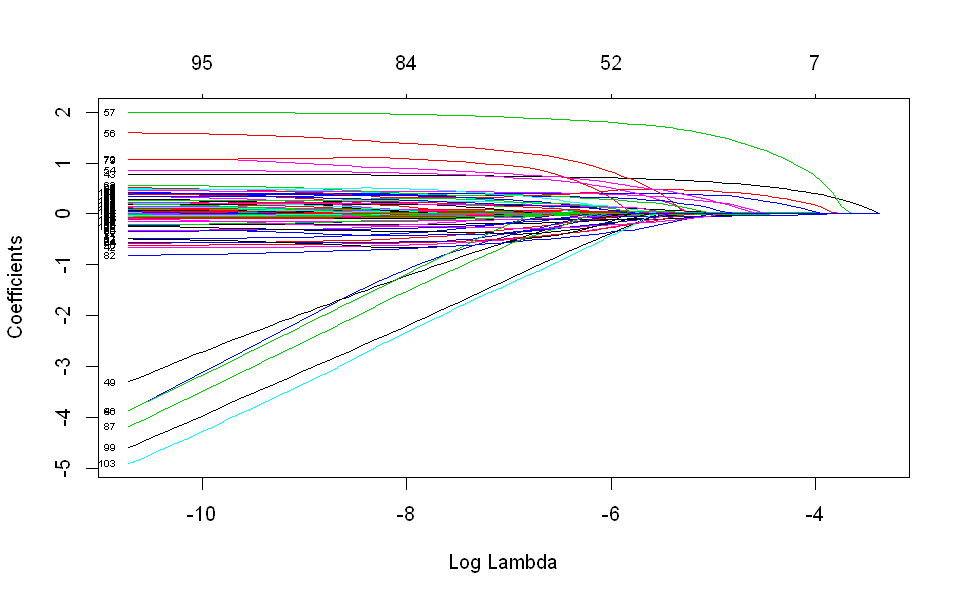

In [195]:
options(repr.plot.width=8,repr.plot.height=5)
plot(fit.lasso, xvar="lambda",label = TRUE)

Note: the figures across the top are the number of nonzero coefficient predictors.

##### Count the number of non-zero coefficients where log lambda is -5

In [196]:
# count the number of non-zero coefficients where log lambda is -5
data.frame(no=attr(coef(fit.lasso, s = exp(-5)),"i"), coef=attr(coef(fit.lasso, s = exp(-5)),"x")) %>% subset(coef > 0) %>% nrow-1 # minus the intercept

[1] 15

##### Findings

- Overall, when the lambda increases, the number of predictors decreases

- It could be said that penalising does works

- For example, the number of non-zero coefficients where $log(\lambda)=-5$ is 15 predictors

### Cross Validation to figure out the best hyper parameter lambda

Next, figure out the appropriate number of lambda based on indicators which cross-validation gives.

In this section, 10 fold cross validation is adopted.

##### Fitting with cv

In [197]:
# Use 10 fold, which is the default method for cv.glmnet()
# 20 fold has been tried but lambda.min was unchanged, so, 10 fold is enough for here
cvfit.lasso=cv.glmnet(modelmat.lasso,y=df.subsetbase[,"CARAVAN"], alpha=1, family='binomial')

##### Plot the result
Check the changing deviance while lambda is increasing

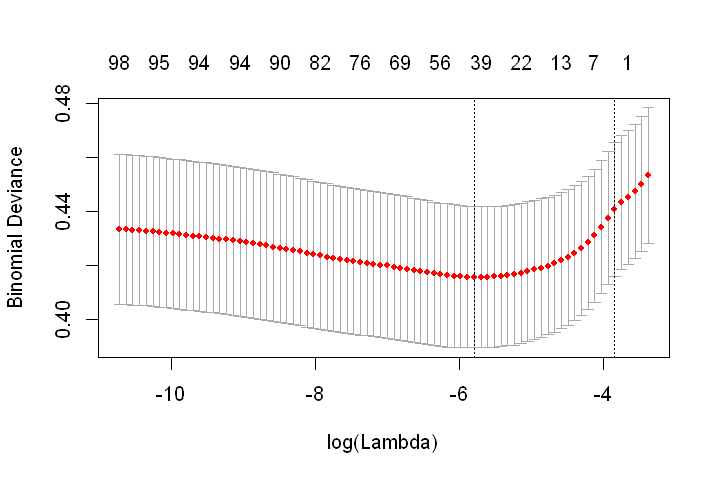

In [198]:
options(repr.plot.width=6,repr.plot.height=4)
plot(cvfit.lasso)

##### Show the optimum lambda and the number of vairables correponding to lambda

In [199]:
# show lambda where the deviance is minimum
cvfit.lasso$lambda.min
cvfit.lasso$lambda.1se
# count the number of non-zero coefficients where the lambda is min, 1se
data.frame(no=attr(coef(fit.lasso, s = cvfit.lasso$lambda.min),"i"), coef=attr(coef(fit.lasso, s = cvfit.lasso$lambda.min),"x")) %>% subset(abs(coef) > 0) %>% nrow-1 # minus the intercept
data.frame(no=attr(coef(fit.lasso, s = cvfit.lasso$lambda.1se),"i"), coef=attr(coef(fit.lasso, s = cvfit.lasso$lambda.1se),"x")) %>% subset(abs(coef) > 0) %>% nrow-1 # minus the intercept

[1] 0.003044478

[1] 0.02147819

[1] 43

[1] 4

##### Findings 1

- There is a minimum deviance point where $\lambda \approx0.0025$.

- The number of predictors at the lambda is 47.

##### Findings 2

- There is the 1se deviance point from the minimum where $\lambda \approx0.0123$.

- The number of predictors at the lambda is 10.

### Cross Validation to measure the accuracy

Both $\lambda$ giving the minimum deviance and the 1se-deviance could be the candidates of a hyperparameter which produce the best accuracy.

Hence, try both parameters in this section.

##### Define the function performing the k-fold cross validation and return the results of predictions

In [200]:
library("caret")
cv_kfold_lasso=function(kfold, lambda){
    folds=createFolds(df.subsetbase[,"CARAVAN"],k=kfold)
    preds.lasso=list()
    labels.lasso=list()
    fits.lasso=list()

    for (i in seq(1,kfold)){
        # define train and test predictors
        train_cols=setdiff(cols.subsetbase, "CARAVAN")
        # define train and test data frames
        train_data  =data.matrix(df.subsetbase[-folds[[i]],train_cols])
        train_labels=df.subsetbase[-folds[[i]],"CARAVAN"]
        test_data   =data.matrix(df.subsetbase[ folds[[i]],train_cols])
        test_labels =df.subsetbase[ folds[[i]],"CARAVAN"]
        # fitting
        fit=glmnet(x=train_data, y=train_labels, alpha=1, family='binomial', lambda=lambda)
        # store results into lists
        pred=predict(fit, newx=test_data)
        preds.lasso[[i]]=as.numeric(pred)
        labels.lasso[[i]]=test_labels
        fits.lasso[[i]]=fit
    }
    list(preds.lasso, labels.lasso, fits.lasso)
}

##### CV by `lambda.min`

In [201]:
results_min=cv_kfold_lasso(kfold = 10, lambda=cvfit.lasso$lambda.min)

##### Issue when executing `cv_kfold_lasso` with `lambda.min`

This execution sometimes get the warning message below;

<p style="background-color: #fdd;">Convergence for 1th lambda value not reached after maxit=100000 iterations; solutions for larger 
 lambdas returned </p>

It occurs when `glmnet()` is executed because lambda.min is too low to convergent.

There are 2 solutions to this issue;

1. Use a larger lambda as the message suggests, such as lambda.1se

2. Use a model fitted by cv.glmnet() according to [a forum](https://stats.stackexchange.com/questions/101101/convergence-for-1st-lambda-value-not-reached-error-using-glmnet-package-and-sp)

However, the 2nd solution is not appropriate since a model fitted by cv.glmnet() contains a whole training data. For cross-validation, data for testing should not be involved in the model.

Hence, **the lambda of 1se is adopted in the later section**.

##### Predicting and measure the accuracy based on `lambda.1se`

In [202]:
results_1se=cv_kfold_lasso(kfold = 10, lambda=cvfit.lasso$lambda.1se)
get_cv_accuracy(preds = results_1se[[1]], tests = results_1se[[2]])

[1] "Accuracy mean is 0.114"
[1] "Accuracy variance is 0.00151"


one_fold,whole_holders,mostlikely,detected_holders,accuracy
<int>,<int>,<dbl>,<int>,<dbl>
582,30,116,17,0.147
583,35,117,19,0.162
582,38,116,14,0.121
582,41,116,17,0.147
582,35,116,6,0.052
582,32,116,13,0.112
582,38,116,14,0.121
582,39,116,6,0.052
582,30,116,10,0.086


### Confirm the coefficients chosen by `lambda.1se`

By executing `coef(cvfit.lasso, s = "lambda.1se")`, the predictor list and their coefficients are extracted as below;

| variable    | description                        | coefficient |
|-------------|------------------------------------|-------------|
| (Intercept) | -                                  | -3.4716     |
| MRELGE      | Married                            | 0.0052      |
| MOPLHOOG    | High level education               | 0.0060      |
| MOPLLAAG    | Lower level education              | -0.0278     |
| MAUT1       | 1 car                              | 0.0024      |
| MINKGEM     | Average income                     | 0.0372      |
| MKOOPKLA    | Purchasing power class             | 0.0371      |
| AWAPART     | # of private third party insurance | 0.2212      |
| APERSAUT    | # of car policies                  | 0.5171      |
| APLEZIER    | # of boat policies                 | 1.1687      |
| MOSTYPE8    | Middle class families              | 0.3339      |

##### Findings

- The number of boat policies is far larger than other features
- All of the predictors have positive coefficients except lower level education

### Measure the accuracy of evaluation data  (Lasso Regression)

In this section, do the prediction based on the evaluation data by the Lasso model.

The input data for prediction is `ticeval2000.txt` and the corresponding label data is `tictgts2000.txt`.

##### Data Preparation

Prepare the data frame based on `ticeval2000.txt` and then filter predictors into the same ones used in CV.

In [203]:
cols=setdiff(cols.subsetbase, "CARAVAN")
xmat.eval.lasso=data.matrix(df.eval.dm[cols])

##### Prediction by lambda.1se
The Model based on the whole data of `ticdata2000.txt` is already created as below while doing cross-validation.

`cvfit.lasso=cv.glmnet()`

Doing prediction by this model and the evaluation data.

In [204]:
pred.eval.lasso.1se=predict(cvfit.lasso, newx=xmat.eval.lasso, newtype = "response", s = "lambda.1se")

##### Measure the accuracy

In [205]:
get_eval_accuracy(pred.eval.lasso.1se, targets)

observations,whole_holders,mostlikely,detected_holders,accuracy
<int>,<int>,<dbl>,<int>,<dbl>
3999,238,800,91,0.114


### Summary where lambda is `lambda.1se`

- The number of predictors is 10

- The mean of accuracies of CV is 0.157 and its variance is 0.00091

- The accuracy based on the evaluation data is 0.13

# Third model
# Linear Discriminant Analysis

Based on the findings in the previous exploration, the predictors below are used for prediction.

1. MOPLLAAG - Lower level education
2. MBERARBG - Skilled labourers
3. MBERHOOG - High status
4. MSKC - Social class C
5. MINK4575 - Income 45-75.000
6. MINKGEM - Average income
7. MKOOPKLA - Purchasing power class
8. MAUT1 - 1 car
9. ABRAND - Number of fire policies
10. AWAPART - Number of private third party insurance
11. APERSAUT - Number of car policies

### Cross Validation (LDA)

Perform cross-validation to measure the accuracy of the training data.


##### CV with 10 fold cross validation

In [206]:
df.lda=df.dm[c(cols.lda, "CARAVAN")]

In [207]:
library("caret")
library("MASS")
kfold=10
folds=createFolds(df.lda[,"CARAVAN"],k=kfold)
preds.lda=list()
labels.lda=list()

for (i in seq(1,kfold)){
    # define train and test predictors
    train_cols=setdiff(cols.lda, "CARAVAN")
    # define train and test data frames
    train_data  =df.lda[-folds[[i]],train_cols]
    train_labels=df.lda[-folds[[i]],"CARAVAN"]
    test_data   =df.lda[ folds[[i]],train_cols]
    test_labels =df.lda[ folds[[i]],"CARAVAN"]
    # fitting
    fit=lda(x=train_data, grouping=train_labels)
    # store results into lists
    pred=predict(object=fit, newdata=test_data)
    preds.lda[[i]]=pred$x[,"LD1"]
    labels.lda[[i]]=test_labels
}

##### Measure the accuracy

In [208]:
get_cv_accuracy(preds = preds.lda, tests = labels.lda)

[1] "Accuracy mean is 0.146"
[1] "Accuracy variance is 0.00118"


one_fold,whole_holders,mostlikely,detected_holders,accuracy
<int>,<int>,<dbl>,<int>,<dbl>
583,39,117,12,0.103
582,19,116,12,0.103
582,37,116,20,0.172
582,28,116,16,0.138
582,35,116,19,0.164
582,46,116,23,0.198
582,41,116,22,0.190
582,35,116,13,0.112
582,36,116,16,0.138


### Measure the accuracy of evaluation data  (Linear Discriminant Analysis)

In this section, do the prediction based on the evaluation data by LDA.

The input data for prediction is `ticeval2000.txt` and the corresponding label data is `tictgts2000.txt`.

##### Fitting
Generate the model based on the whole data of `ticdata2000.txt`

In [209]:
fit.lda=lda(x=df.lda[cols.lda], grouping=df.dm[,"CARAVAN"])

##### Have a look the fittied model

In [210]:
fit.lda

Call:
lda(df.lda[cols.lda], grouping = df.dm[, "CARAVAN"])

Prior probabilities of groups:
         0          1 
0.94021646 0.05978354 

Group means:
  MOPLLAAG MBERARBG     MSKC MINK4575  MINKGEM MKOOPKLA    MAUT1 APERSAUT
0 4.624520 2.237895 3.778915 2.702905 3.754431 4.188014 6.012607 0.540106
1 3.747126 1.928161 3.433908 3.172414 4.255747 5.000000 6.471264 0.908046
  MBERHOOG    ABRAND   AWAPART
0 1.865704 0.5613009 0.3919240
1 2.359195 0.7068966 0.5775862

Coefficients of linear discriminants:
                 LD1
MOPLLAAG -0.13008332
MBERARBG -0.03454220
MSKC      0.10124422
MINK4575 -0.02481472
MINKGEM   0.16567077
MKOOPKLA  0.11020646
MAUT1     0.10699209
APERSAUT  1.10232280
MBERHOOG  0.04085439
ABRAND    0.24769507
AWAPART   0.56238007

##### Data Preparation

Prepare the data frame based on `ticeval2000.txt` and then filter predictors into the same ones used in CV.

In [211]:
df.eval.lda=df.eval.dm[cols.lda]

##### Prediction

In [212]:
pred.eval.lda=predict(object=fit.lda, newdata=df.eval.lda)$x[,"LD1"]

##### Measure the accuracy

In [213]:
get_eval_accuracy(pred.eval.lda, targets)

observations,whole_holders,mostlikely,detected_holders,accuracy
<int>,<int>,<dbl>,<int>,<dbl>
3999,238,800,108,0.135


### Summary  (Linear Discriminant Analysis)

- The number of predictors is 11

- The mean of accuracies of CV is 0.149 and its variance is 0.00161

- The accuracy based on the evaluation data is 0.135

# Model Comparison

### Accuracy

The summary of accuracies is below.

| Indicator                     | Logistic Regression & Subset Selection | Lasso Logistic Regression | Linear Descriminant Analysis |
|-------------------------------|----------------------------------------|---------------------------|------------------------------|
| Mean Accuracy in CV           | 0.164                                  | 0.157                     | 0.149                        |
| Variance of Accuracy in CV    | 0.00078                                | 0.00091                   | 0.00161                      |
| Accuracy with Evaluation Data | 0.126                                  | 0.13                      | 0.135                        |

The model of Logistic Regression with Subset Selection performs the best accuracy in the cross-validation, whereas the actual accuracy with the evaluation data falls into the lowest accuracy. It indicates that the fitted model would be more overfitting than other models.

The performance of Lasso Logistic Regression model is situated in the middle between the other 2 models.

The model of LDA performs the smallest accuracy gap between CV and the prediction based on the evaluation data. In addition, it achieves the best accuracy with the evaluation data.

In conclusion, in terms of accuracy and its stability, LDA is the best model.

In terms of the assumptions which the models have, LDA assuming that variables normally and separately distribute shows a better performance than Logistic Regressions which assume that predictors are correlated with a response variable. At this point, it would be insisted that the properties of features which LDA expects are slightly more directly connecting to the prediction of the actual policyholders than other properties of features which Logistic Regression assume.

### Feature selection and their coeffients

Next, comparing the features which each model selects and their coefficients. The summarised information is shown in the table below.

| Data Source       | Variables   | Description                             | Rank of Correlation Ratio | Subset Selection | Lasso  | LDA    |
|-------------------|-------------|-----------------------------------------|---------------------------|------------------|--------|--------|
| -                 | (Intercept) | -                                       | -                         | -4.061           | -3.472 | -      |
| PRODUCT OWNERSHIP | AWAPART     | # of private third party insurance      | 6                         | 0.611            | 0.221  | 0.562  |
| PRODUCT OWNERSHIP | ABRAND      | # of fire policies                      | 18                        | -                | -      | 0.248  |
| PRODUCT OWNERSHIP | ABYSTAND    | # of social security insurance policies | 13                        | 0.574            | -      | -      |
| PRODUCT OWNERSHIP | APERSAUT    | # of car policies                       | 1                         | 0.772            | 0.517  | 1.102  |
| PRODUCT OWNERSHIP | APLEZIER    | # of boat policies                      | 2                         | 2.052            | 1.169  | -      |
| SOCIO DEMOGRAPHIC | MOSTYPE8    | Middle class families                   | -                         | 0.715            | 0.334  | -      |
| SOCIO DEMOGRAPHIC | MOSTYPE12   | Affluent young families                 | -                         | 0.851            | -      | -      |
| SOCIO DEMOGRAPHIC | MRELGE      | Married                                 | 11                        | 0.128            | 0.005  | -0.035 |
| SOCIO DEMOGRAPHIC | MAUT1       | 1 car                                   | 12                        | -                | 0.002  | 0.107  |
| SOCIO DEMOGRAPHIC | MBERARBG    | Skilled labourers                       | 28                        | -                | -      | -      |
| SOCIO DEMOGRAPHIC | MOPLLAAG    | Lower level education                   | 4                         | -0.119           | -0.028 | -0.130 |
| SOCIO DEMOGRAPHIC | MOPLHOOG    | High level education                    | 7                         | -                | 0.006  | -      |
| SOCIO DEMOGRAPHIC | MBERHOOG    | High status                             | 14                        | -                | -      | 0.041  |
| SOCIO DEMOGRAPHIC | MSKC        | Social class C                          | 29                        | -                | -      | 0.101  |
| SOCIO DEMOGRAPHIC | MINK4575    | Income 45-75.000                        | 20                        | -                | -      | -0.025 |
| SOCIO DEMOGRAPHIC | MINKGEM     | Average income                          | 5                         | -                | 0.037  | 0.166  |
| SOCIO DEMOGRAPHIC | MKOOPKLA    | Purchasing power class                  | 3                         | -                | 0.037  | 0.110  |

Overall, the subset selection chooses the same number of features from product ownership and socio-demographic respectively, whereas Lasso and LDA more choose their features from socio-demographic.

In terms of similarity of feature selection, the subset selection is more close to Lasso than LDA. It shares 75% of features with Lasso, whereas 50% with LDA. On the other hand, Lasso is situated in the middle between the subset selection and LDA. It shares 60% of its features with the subset selection, likely, it shares 70% of its features with LDA.

When it comes to the taste of the whole selected features, most of them directly or indirectly indicate a factor of a wealth of customers, such as social status, income, purchasing power, education level, the number of boat policies.

In terms of relationship between the correlation ratio and the feature selection, subset selection and Lasso select mainly from highly correlated variables to CARAVAN, yet LDA selects relatively less correlated variables compared to other models.

### Advantages and Disadvantages

In terms of the prediction task, LDA shows the best performance. However, the gap in accuracy is not very large. Namely, Logistic Regression based on the subset selection demonstrates 0.126 accuracies, whereas LDA makes 0.135 accuracies. It corresponds to 101 and 108 detected actual caravan policyholder respectively.

When it comes to the description task, Logistic Regression with the subset selection has big advantages comparing to other models. Firstly, it has been figured out that most of the selected features are significant. Secondly, unlike LDA, the figure of coefficients directly denote the amount of contribution to the probability that a customer is an actual caravan policyholder.

In conclusion, Logistic Regression with the subset selection is the most appropriate model for the description task.

# Description Task

### Predictors having a significant impact

As the previous paragraph mentions, this task is performed based on the model of Logistic Regression with the subset selection.

The selected features and their coefficients are below;

| Data Source       | Variables   | Description                             | Coefficient |
|-------------------|-------------|-----------------------------------------|------------------|
| -                 | (Intercept) | -                                       | -4.061           |
| PRODUCT OWNERSHIP | AWAPART     | # of private third party insurance      | 0.611            |
| PRODUCT OWNERSHIP | ABYSTAND    | # of social security insurance policies | 0.574            |
| PRODUCT OWNERSHIP | APERSAUT    | # of car policies                       | 0.772            |
| PRODUCT OWNERSHIP | APLEZIER    | # of boat policies                      | 2.052            |
| SOCIO DEMOGRAPHIC | MOSTYPE8    | Middle class families                   | 0.715            |
| SOCIO DEMOGRAPHIC | MOSTYPE12   | Affluent young families                 | 0.851            |
| SOCIO DEMOGRAPHIC | MRELGE      | Married                                 | 0.128            |
| SOCIO DEMOGRAPHIC | MOPLLAAG    | Lower level education                   | -0.119           |

Based on those selected features, the formula to calculate the probability that a customer purchases the caravan policy is denoted as below;

$Pr(Caravan = Buy)=(1+\exp^{-(intercept*0.611*awapart+0.574*abystand+0.772*apersaut+2.052*aplezier+0.715*mostype8+0.851*mostype12+0.128*mrelge-0.119*mopllaag)})^{-1}$

A simple interpretation of this formula is that the features having positive coefficients have a positive impact on purchasing the caravan policy. In addition, the size of the coefficient corresponds to the magnitude of the impact. 

From those views, `the number of boat policies` has the biggest impact on the customer's behaviour. However, the number of customers who actually have that policy also should be considered. Otherwise, fewer customers will be approached by the marketing department. The histograms showing the frequency of the number of policies are below;

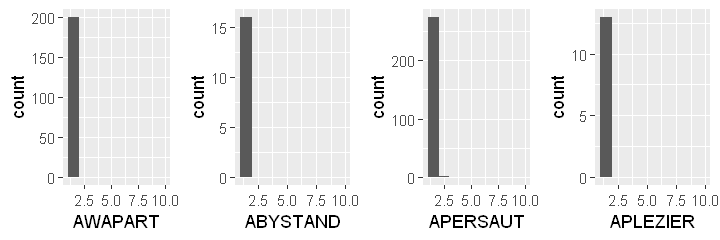

In [451]:
vec.AWAPART=df.dm.holder[df.dm.holder[,"AWAPART"]>0,"AWAPART"]
vec.ABYSTAND=df.dm.holder[df.dm.holder[,"ABYSTAND"]>0,"ABYSTAND"]
vec.APERSAUT=df.dm.holder[df.dm.holder[,"APERSAUT"]>0,"APERSAUT"]
vec.APLEZIER=df.dm.holder[df.dm.holder[,"APLEZIER"]>0,"APLEZIER"]
plots.hist.plc=list()
plots.hist.plc[[1]]=ggplot()+geom_histogram(aes(x=vec.AWAPART),breaks=seq(1,10))+labs(x ="AWAPART")
plots.hist.plc[[2]]=ggplot()+geom_histogram(aes(x=vec.ABYSTAND),breaks=seq(1,10))+labs(x ="ABYSTAND")
plots.hist.plc[[3]]=ggplot()+geom_histogram(aes(x=vec.APERSAUT),breaks=seq(1,10))+labs(x ="APERSAUT")
plots.hist.plc[[4]]=ggplot()+geom_histogram(aes(x=vec.APLEZIER),breaks=seq(1,10))+labs(x ="APLEZIER")
# Draw the plots
options(repr.plot.width=6,repr.plot.height=2)
library(gridExtra)
do.call("grid.arrange", c(plots.hist.plc, ncol=4))

Although APLEZIER (the number of boat policies) has the largest magnitude of coefficient, its frequency is very low compared to AWAPART (the number of private third party insurance) and APERSAUT (the number of car policies). The same perspective can be applied to other features.

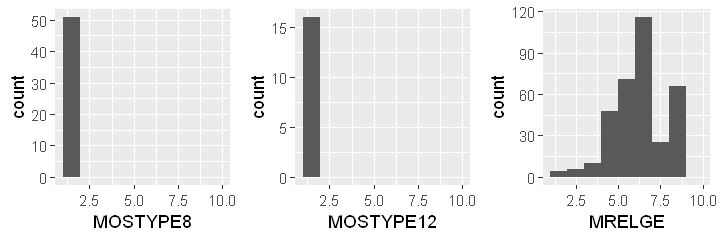

In [453]:
vec.MOSTYPE8=df.dm.holder[df.dm.holder[,"MOSTYPE8"]>0,"MOSTYPE8"]
vec.MOSTYPE12=df.dm.holder[df.dm.holder[,"MOSTYPE12"]>0,"MOSTYPE12"]
vec.MRELGE=df.dm.holder[df.dm.holder[,"MRELGE"]>0,"MRELGE"]
plots.hist.plc2=list()
plots.hist.plc2[[1]]=ggplot()+geom_histogram(aes(x=vec.MOSTYPE8),breaks=seq(1,10))+labs(x ="MOSTYPE8")
plots.hist.plc2[[2]]=ggplot()+geom_histogram(aes(x=vec.MOSTYPE12),breaks=seq(1,10))+labs(x ="MOSTYPE12")
plots.hist.plc2[[3]]=ggplot()+geom_histogram(aes(x=vec.MRELGE),breaks=seq(1,10))+labs(x ="MRELGE")
# Draw the plots
options(repr.plot.width=6,repr.plot.height=2)
library(gridExtra)
do.call("grid.arrange", c(plots.hist.plc2, ncol=3))

MOSTYPE8 (Middle class families) has the 3rd largest magnitude on the coefficient as well as having the relatively large number of frequency. In such a view, customers who are categorised as the middle class families could be the first option to approach for marketing.

# Reference

James, G., Witten, Daniela, author, Hastie, Trevor, author, & Tibshirani, Robert, author. (2015). An introduction to statistical learning : With applications in R (Springer texts in statistics).

Minitab, LLC. (2019). What are complete separation and quasi-complete separation?  Retrieved from:  https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/regression/supporting-topics/logistic-regression/what-are-complete-separation-and-quasi-complete-separation/